# Analyse jeux olympiques
données de 1896 à 2016

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import mysql.connector

# Loading data into a panda dataframe

In [42]:
db_host = '127.0.0.1'
db_port = '3306'
db_user = 'db_root'
db_password = 'db_root'
db_name = 'olympic_games'

conn = mysql.connector.connect(
    host=db_host,
    port=db_port,
    user=db_user,
    password=db_password,
    database=db_name
)

query = 'SELECT * FROM athlete_events'
df = pd.read_sql(query, conn)

print(df.head())
# df = pd.read_csv('./data/athlete_events.csv')

C:\Users\pc\AppData\Local\Temp\ipykernel_16376\918227463.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event   Medal  
0       Basketball Men's Basketball    NA\r  
1      Judo Men's Extra-Lightweight    NA\r  
2           Football

## Combien d'athlètes français ont été médaillé ?

Filtrage des données pour isoler les athlètes français qui ont eu des médailles

In [49]:
fra_medal_df = df[(df['NOC'] == 'FRA') & (df['Medal'] != 'NA\r')]

Compte le nombre de médailles par type de médailles (or, argent, bronze)

In [50]:
medal_counts = fra_medal_df['Medal'].value_counts()

) missing from current font.es\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


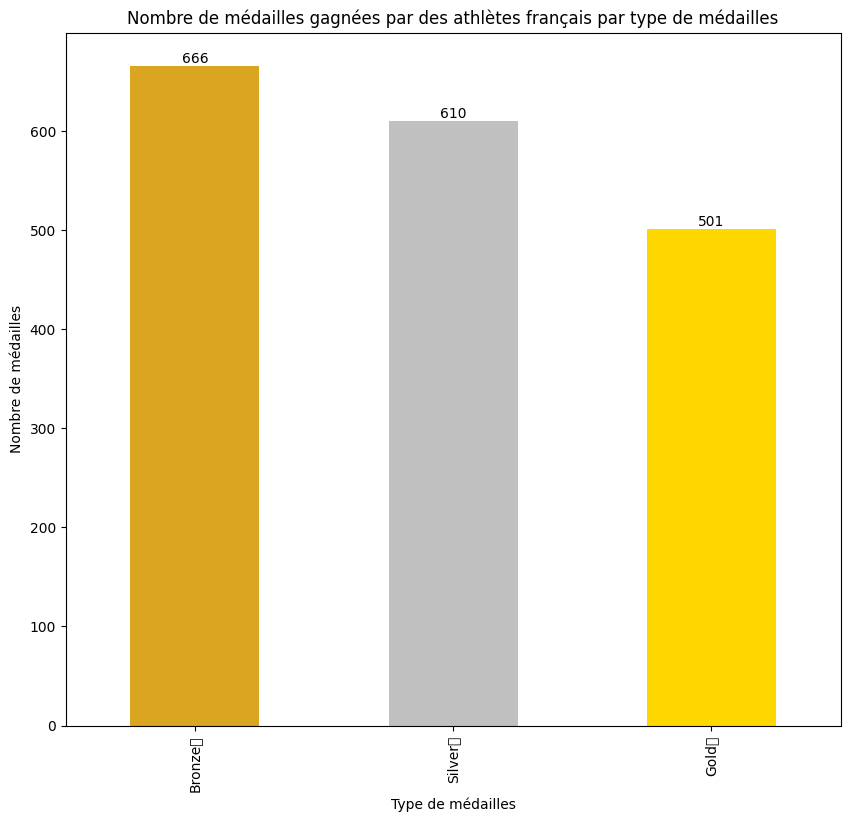

In [51]:
# Affichage du graphique
plt.figure(figsize=(10, 9))
colors = ['goldenrod', 'silver', 'gold']

medal_counts.plot(kind='bar', color = colors)
plt.title('Nombre de médailles gagnées par des athlètes français par type de médailles')
plt.xlabel('Type de médailles')
plt.ylabel('Nombre de médailles')
ax = plt.gca()
for container in ax.containers:
    plt.bar_label(container)
    
plt.show()

## Nombre total d'athlètes français médaillés

In [52]:
#On compte le nombre d'athlète en éliminant les doublons
num_medaled_french_athletes = len(fra_medal_df['ID'].unique())

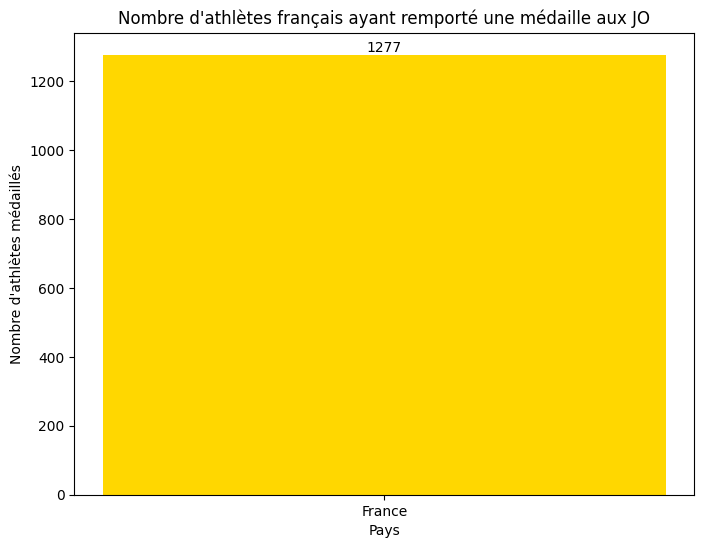

In [53]:
#Affichage du graphique
plt.figure(figsize=(8, 6))
plt.bar(['France'], [num_medaled_french_athletes], color='gold')
plt.title("Nombre d'athlètes français ayant remporté une médaille aux JO")
plt.xlabel('Pays')
plt.ylabel("Nombre d'athlètes médaillés")

ax = plt.gca()
for container in ax.containers:
    plt.bar_label(container)
    
plt.show()

La france à donc 1277 athlètes qui ont remporté des médailles de 1896 à 2016 tous JO confondus (été/hiver).
Ces 1277 athlètes ont remporté 666 médailles de bronze, 610 médailles d'argent et 501 médailles d'or.


## Quels sont les plus grands athlètes français dans l'histoire des JO ?

In [54]:
# On compte les médailles pour chaque athlète puis on trie le dataframe dans le sens descendant 
fra_athlete_medal_count = fra_medal_df.groupby('Name')['Medal'].count().sort_values(ascending=False)

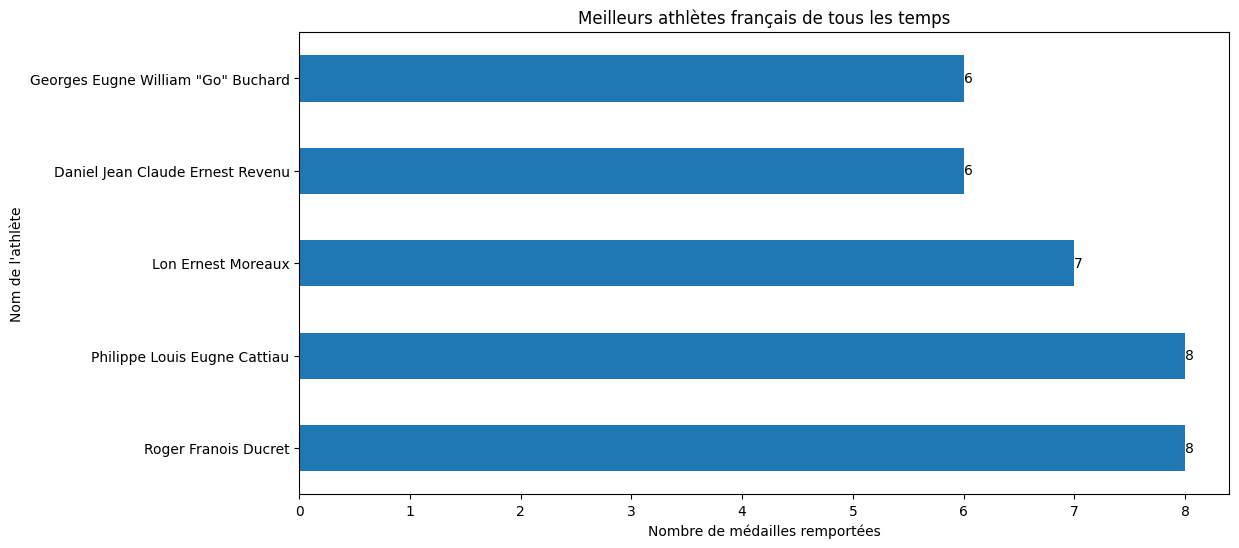

In [55]:
#Affichage du graphique
plt.figure(figsize=(12, 6))
fra_athlete_medal_count.head().plot(kind='barh')
plt.title('Meilleurs athlètes français de tous les temps')
plt.ylabel("Nom de l'athlète")
plt.xlabel('Nombre de médailles remportées')
ax = plt.gca()
for container in ax.containers:
    plt.bar_label(container)
    
plt.show()

Roger François Ducret et louis Cattiau sont les athlètes français les plus médaillés de 1890 à 2016. Ils sont tout deux spécialisé en escrime.

## Comment se classe la france dans l'histoire des JO ? 

In [56]:
# Filtrer les données pour inclure uniquement les lignes avec des médailles
medal_df = df[df['Medal'] != 'NA\r']

In [57]:
# tableau croisé dynamique pour compter le nombre de médailles par pays
medal_counts_by_country = pd.pivot_table(medal_df, index='NOC', values='Medal', aggfunc='count')

In [58]:
# Tri des pays par nombre total de médailles
sorted_countries = medal_counts_by_country.sort_values(by='Medal', ascending=False).head(15)

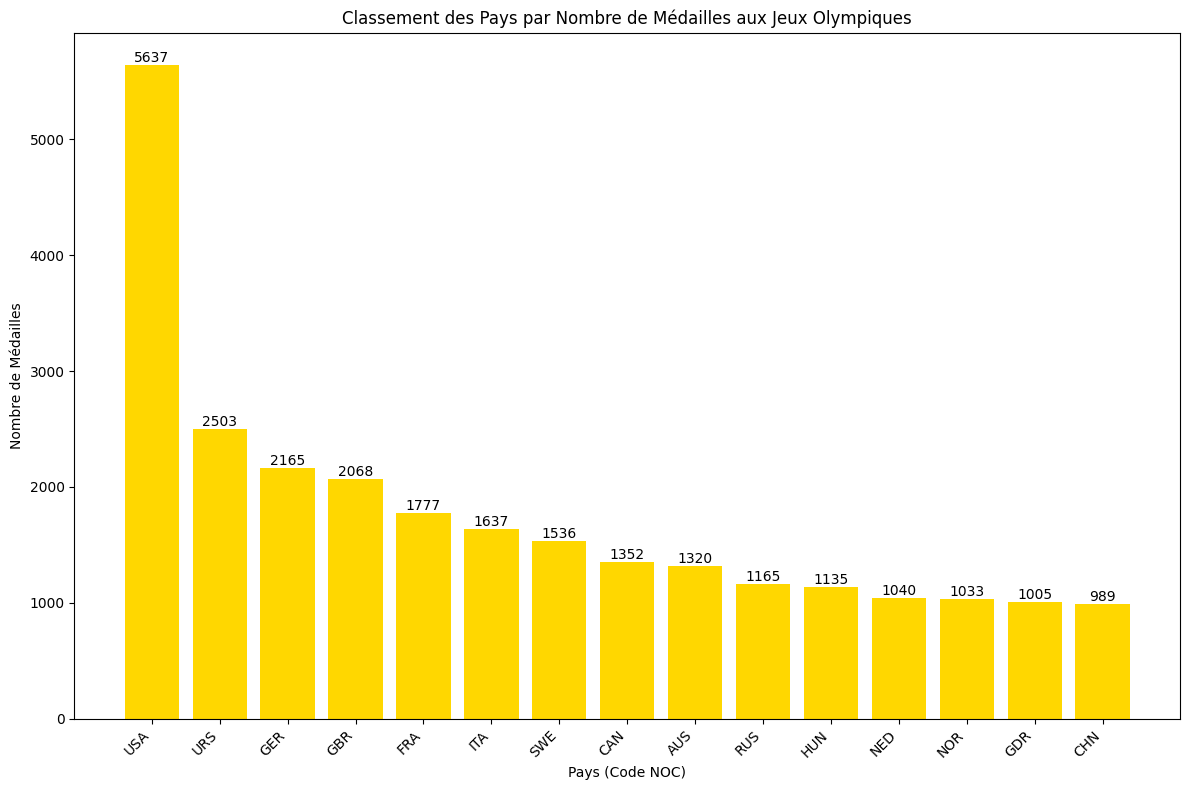

In [59]:
# Affichage
plt.figure(figsize=(12, 8))
plt.bar(sorted_countries.index, sorted_countries['Medal'], color='gold')
plt.title('Classement des Pays par Nombre de Médailles aux Jeux Olympiques')
plt.xlabel('Pays (Code NOC)')
plt.ylabel('Nombre de Médailles')
plt.xticks(rotation=45, ha='right')

ax = plt.gca()
for container in ax.containers:
    plt.bar_label(container)

plt.tight_layout()
plt.show()

Nous pouvons voir que la france se classe 5 eme pays par rapport au nombre de médailles gagnées depuis 1890 avec 1777 médailles remportées toutes disciplines et JO confondus.

## Quels sont les pays qui ont le plus gagné par discipline ?

In [60]:
# Filtrage des données pour inclure uniquement les lignes avec des médailles
medal_df = df[df['Medal'].notna()]

In [61]:
# tableau croisé dynamique pour compter le nombre de médailles par discipline et par pays
pivot_table = pd.pivot_table(medal_df, index=['Sport', 'NOC'], values='Medal', aggfunc='count')

In [62]:
# Récupération du meilleur pays pour chaque discipline
result_table = pivot_table.groupby('Sport')['Medal'].idxmax().apply(lambda x: pd.Series(x)).reset_index()

C:\Users\pc\AppData\Local\Temp\ipykernel_16376\4269174944.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


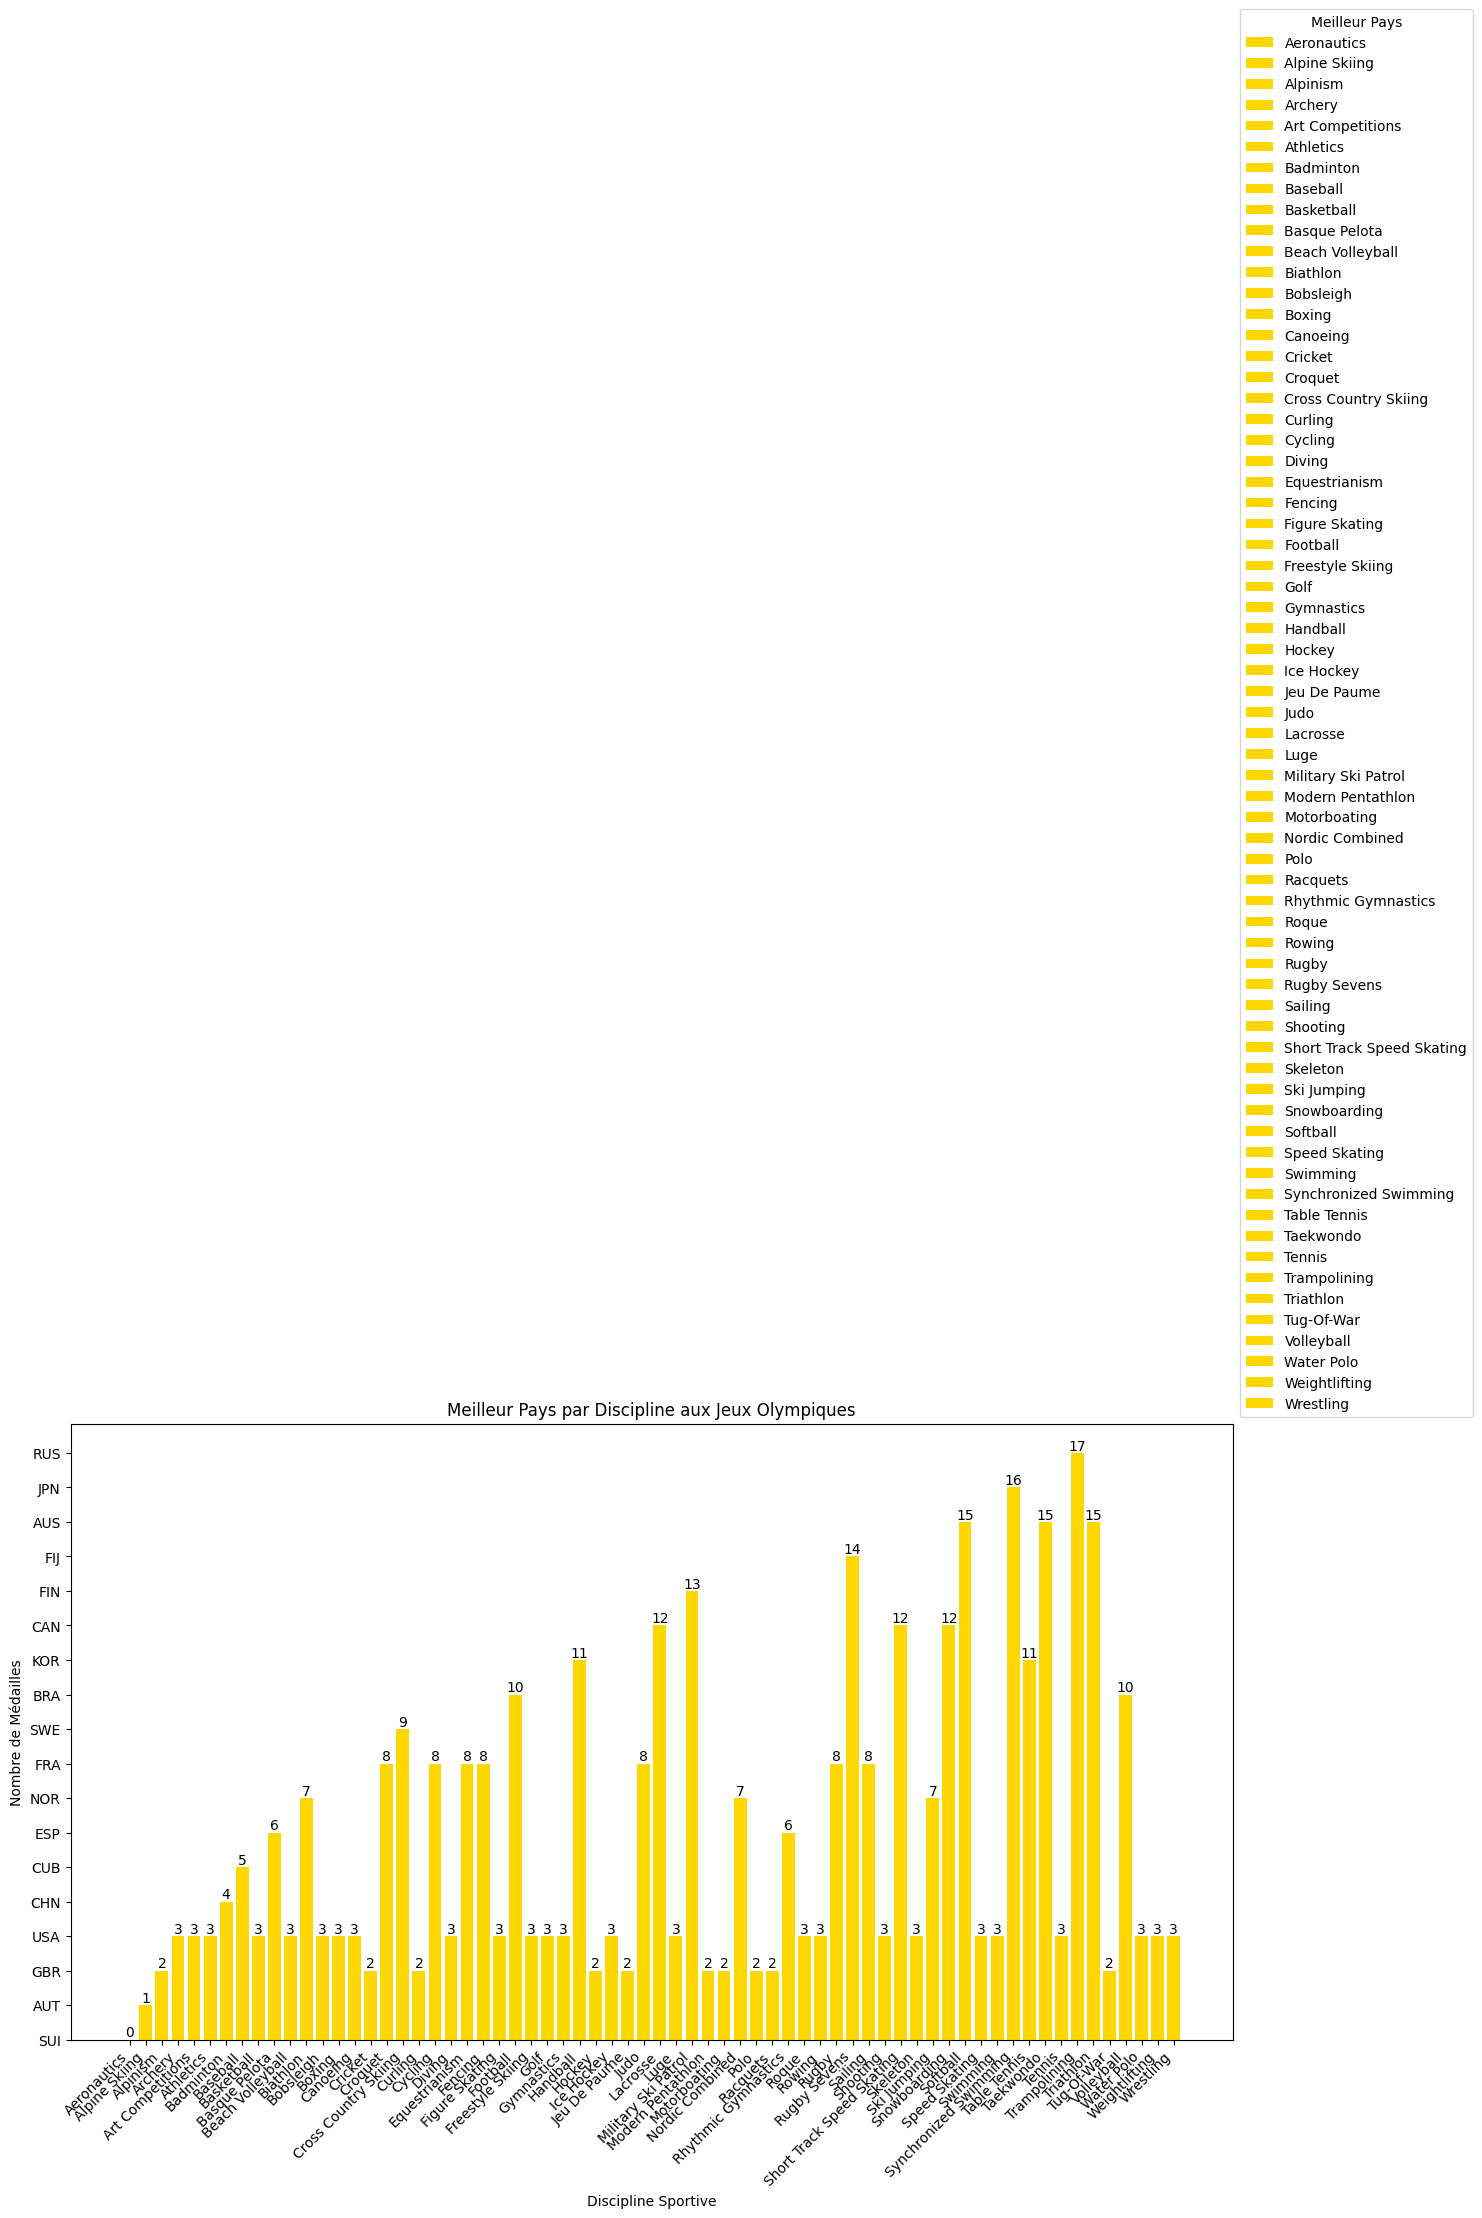

In [63]:
# Renommer les colonnes du résultat
result_table.columns = ['Sport', 'Top_Country', 'Medal_Count']

# Afficher un diagramme à barres pour le meilleur pays par discipline
plt.figure(figsize=(15, 8))
plt.bar(result_table['Sport'], result_table['Medal_Count'], color='gold', label=result_table['Top_Country'])
plt.title('Meilleur Pays par Discipline aux Jeux Olympiques')
plt.xlabel('Discipline Sportive')
plt.ylabel('Nombre de Médailles')
plt.legend(title='Meilleur Pays', loc='lower left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')

ax = plt.gca()
for container in ax.containers:
    plt.bar_label(container)
    
plt.tight_layout()
plt.show()

## Quels sont les athlètes qui ont le plus gagné de médailles dans l’histoire des JO ?

In [65]:
# filtrage du dataframe pour récupérer seulement les athlètes avec des médailles
medal_df = df[df['Medal'] != 'NA\r']

In [66]:
# Compte le nombre de médailles par athlètes et trie le résultat par ordre descendant
athlete_medal_count = medal_df.groupby('Name')['Medal'].count().sort_values(ascending=False)

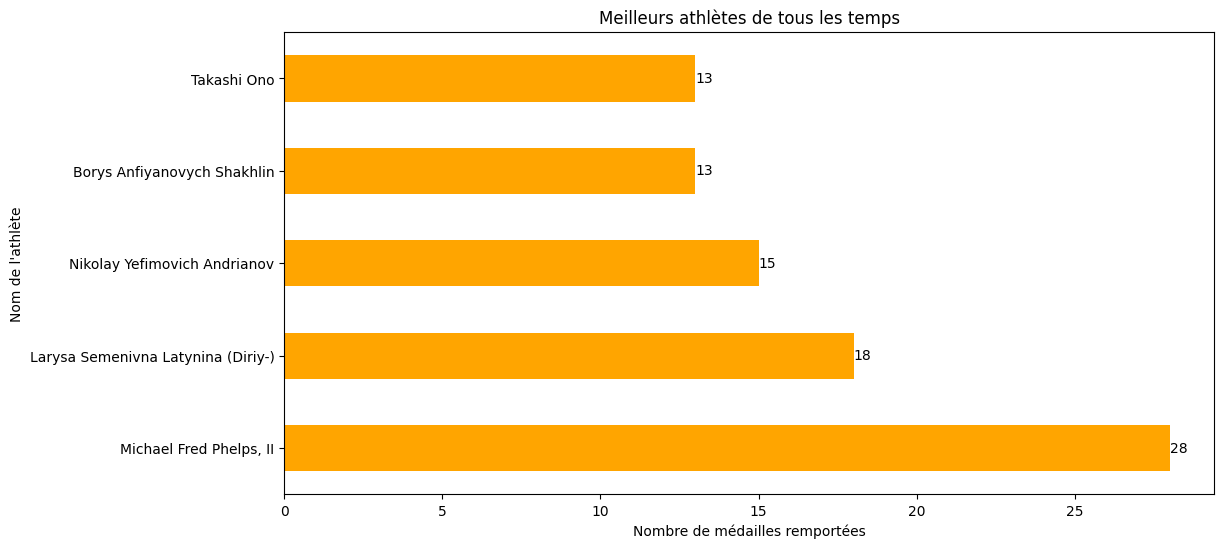

In [67]:

# Affichage du graphique 
plt.figure(figsize=(12, 6))

# Affichage du top 5 des meilleurs athlètes
athlete_medal_count.head().plot(kind='barh', color='orange')

plt.title('Meilleurs athlètes de tous les temps')
plt.ylabel("Nom de l'athlète")
plt.xlabel('Nombre de médailles remportées')
ax = plt.gca()
for container in ax.containers:
    plt.bar_label(container)
    
plt.show()

Voici le top 5 des meilleurs athlètes olympiques sur la période de 1890 à 2016. Le meilleur athlète est donc le nageur américain Michael Phelps qui à remporté pas moins de 28 médailles.

## Quelles conclusions tirez-vous de votre étude des JO par les données ? Pouvez-vous parier les yeux fermés avec vos résultats ?

Cet étude sur les JO permets de se faire une idée des résultats des jeux olympiques à venir en utilisant le machine learning. Cepedant ces prédictions ont plusieurs problème, le premier est qu'elles se basent sur un dataset qui se limite à quelques informations sur chaque athlète (age poid taille) et n'utilise pas d'autres données de contexte historique ou de moyens économiques / sociaux qui sont mis en places par les pays envoyant des athlètes. Donc le facteur principal sur lequel le modèle peut se baser est l'année et le gain de médaille ou non de l'athlète sur tel ou telle épreuve. Il nous paraît donc inconcevable de parier sur les résultats obtenu pour le moment, en revanche si l'on intégrait dans le dataset un ensemble d'informations externe qui peuvent avoir un fort impact sur chaque athlète alors il serait plus facile de faire confiance aux résultats obtenus. 

## Avez-vous besoin du Big Data pour ce projet ? Justifiez votre réponse 

Selon nous pour prédire idéalement les résultats des JO, il faudrait analyser un jeu de donnée beaucoup plus grand afin d'obtenir une prédiction plus précise. Cependant les jeux de données à notre disposition ne sont pas assez volumineux pour plainement exploiter les avantages du big data. En revanche dans la configuration idéale nous pourrions recouper plusieurs dataset avec des données économique, démographique etc alors utiliser le big data deviendrait primordial et nous permettrais d'énormément augmenter la fiabilité de notre modèle

## Que pensez-vous de cet article ?
https://drive.google.com/file/d/1SZQBHHFpucBf3VdmNn_ceuisHGdsklba/view

Cet article est très interressant dans la mesure ou l'auteur montre qu'il ne faut pas se fier uniquement aux résultats des éditions passées pour prédire les résultats des JO à venir. Comme il le spécifie il y a beaucoup d'éléments extérieur avec un impact fort sur la performance d'un athlète. Ces éléments  sont à prendre en compte lors de prédictions et l'auteur s'emploie à nous montrer une manière optimal de créer un modèle d'apprentissage plus efficace qui prend en compte beaucoup plus de données que celles auxquelles nous pourrions penser en premier lieu.

L'article est donc extrêment interressant pour nous qui débutons dans le machine learning car il nous permet de comprendre l'importance de ne pas se limiter à un unique jeu de donnée, mais bien d'étendre au maximum son champs de recherche. Afin d'obtenir des prédictions plus sûre et surtout plus précise et sensée.

## Prédictions

Nous n'avons pas réussi à faire fonctionner l'algorythme d'apprentissage avec notre jeu de données, nous sommes donc incapable de prédire les résultats de l'édition Paris 2024.
Vous trouverez ci dessous le code que nous avons essayé de mettre en place 

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix

#récupération des données d'entrainement
columns = ["ID","Name","Sex","Age","Height","Weight","Team","NOC","Year","Season","Sport","Event","Medal"]

#chargement du dataset
dataset = pd.read_csv('./data/athlete_events.csv', names=columns)

print(dataset.head())


X = dataset.iloc[:,:-1].values

y = dataset.iloc[:,12].values

print(X)
print(y)

#Base d'apprentissage et base de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#Affichage des données d'apprentissage 
print(X_train)

#Affichage des données de test 
print(X_test)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)
print(X_test)

#########################
# Création du modèle à partir des données d'apprentissage
# Pas de phase d'apprentissage 
# Le paramètre n_neighbors prend la valeur 5 
# 5 est une valeur qui donne en moyenne de bons résultats
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

#########################
# Prédictions du modèle à partir des données de test 
y_pred = classifier.predict(X_test)

# Affichage des classes prédites par notre modèle knn
print(y_pred)

#########################
# Evaluation des performances du modèle
# Matrice de confusion
print(confusion_matrix(y_test, y_pred))

# f1 score donne la performance à partir de la matrice de confusion 
print(f1_score(y_test, y_pred, average=None))


C:\Users\pc\AppData\Local\Temp\ipykernel_16376\3124529994.py:13: DtypeWarning: Columns (0,3,4,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('./data/athlete_events.csv', names=columns)


                          ID Name     Sex     Age          Height Weight  \
ID Name                  Sex  Age  Height  Weight            Team    NOC   
1  A Dijiang               M   24     180      80           China    CHN   
2  A Lamusi                M   23     170      60           China    CHN   
3  Gunnar Nielsen Aaby     M   24     NaN     NaN         Denmark    DEN   
4  Edgar Lindenau Aabye    M   34     NaN     NaN  Denmark/Sweden    DEN   

                                Team   NOC    Year     Season       Sport  \
ID Name                        Games  Year  Season       City       Sport   
1  A Dijiang             1992 Summer  1992  Summer  Barcelona  Basketball   
2  A Lamusi              2012 Summer  2012  Summer     London        Judo   
3  Gunnar Nielsen Aaby   1920 Summer  1920  Summer  Antwerpen    Football   
4  Edgar Lindenau Aabye  1900 Summer  1900  Summer      Paris  Tug-Of-War   

                                                Event  Medal  
ID Name          

ValueError: could not convert string to float: 'M'